## 가중치 시각화

In [3]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.keras')

In [4]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [6]:
conv = model.layers[0]  #4차원 형태의 데이터
print(conv.weights[0].shape) #가중치[1] - 절편

(3, 3, 1, 32)


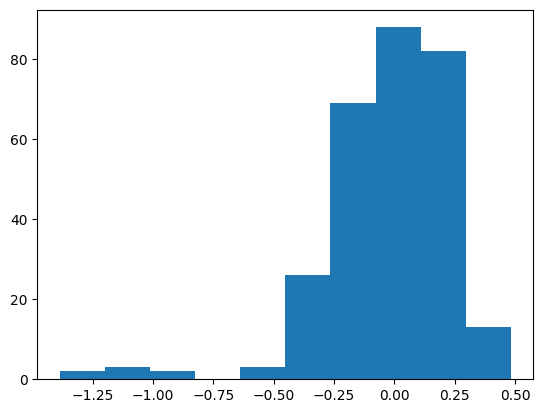

In [8]:
import matplotlib.pyplot as plt
plt.hist(conv.weights[0].numpy().reshape(-1, 1))   #reshape(-1, 1) -> -1 : 어떤 수가 들어오던지 간에, 1 : 1차원으로 만들어줘
plt.show()

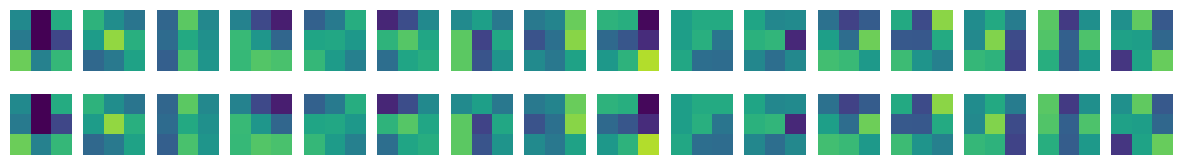

In [9]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
conv_weights = conv.weights[0].numpy()
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, 1*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [10]:
(train_input, trian_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

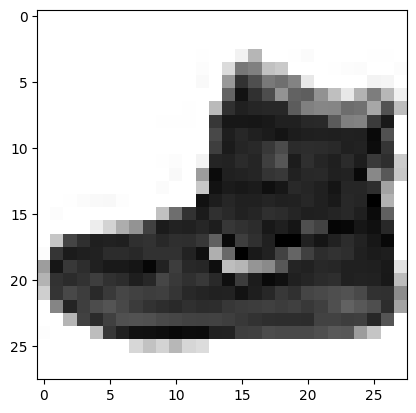

In [11]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [14]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0  #신발데이터

In [15]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)  #model.layers[0] -> conv2D

In [16]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


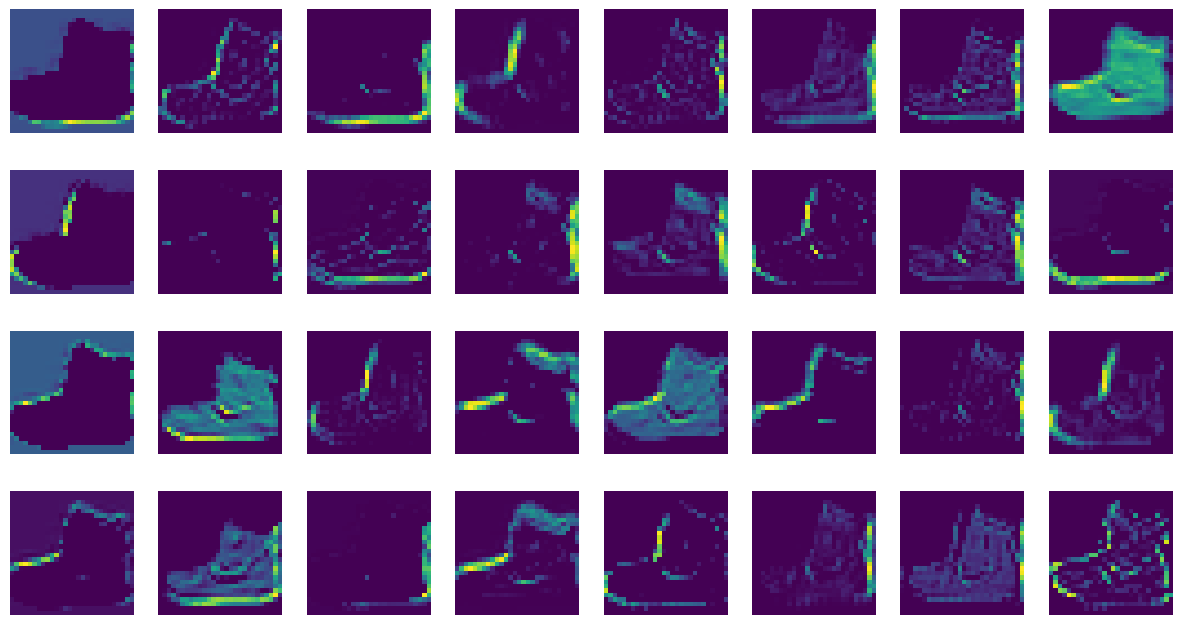

In [18]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
        axs[i, j].axis('off')
plt.show()